# Project: TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
### Columns Description
<ul>
<li>id</li>
<li>imdp id</li>
<li>popularity</li>
<li>budget	</li>
<li>revenue	</li>
<li>original title</li>
<li>cast</li>
<li>homepage</li>
<li>director</li>
<li>tagline</li>
<li>keywords</li>
<li>overview</li>
<li>runtime</li>
<li>genres</li>
<li>production companies</li>
<li>release date</li>
<li>vote count</li>
<li>vote average</li>
<li>release year</li>
<li>budget adj:budget of the associated movie in terms of 2010 dollars, accounting for inflation over time.</li>
<li>revenue adj:revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.</li>
</ul>

### Question(s) for Analysis

<ol>
    <li>Are films with high budget necessary mean high revenue and high average vote?</li>
    <li>Which is the most production company associated with the highest average vote?</li>
    <li>What are the characteristics associated with short and long runtime?</li>
</ol>
 

In [1]:
# import neseccary packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


### Define functions to avoid repetetive code

In [2]:
def head(dataframe):
    """
    function that displays the first 5 rows of a pandas dataframe
    args:
        pandas dataframe
    output:
        the first 5 rows of a pandas dataframe
    """
    return dataframe.head()

<a id='wrangling'></a>
## Data Wrangling



### General Properties


In [3]:
# read the csv files containing the data into a pandas dataframe
df = pd.read_csv('tmdb-movies.csv')
# showing the first 5 rows of the data
head(df)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# showing the data information(columns name, no. of null values, columns data types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### We have alot of missing values as shown, we will start by dropping unneseccary columns, and clean the rows from duplicates and null values


## Data Cleaning


### I will start by droping unneseccary columns

In [5]:
# drop unneseccary columns
df.drop(['id', 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'vote_count', 'budget_adj', 'revenue_adj', 'release_date', 'popularity'], axis=1, inplace=True)

In [6]:
# showing the first 5 rows after droping the unneseccary columns
head(df)

,budget,revenue,original_title,runtime,genres,production_companies,vote_average,release_year
0,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015
2,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015
4,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015


### Drop duplicates

In [7]:
# showing no. duplicates rows
df.duplicated().sum()

1

#### we have one duplicated row

In [8]:
# droping the duplicated rows
df.drop_duplicates(inplace=True)

In [9]:
# showing no. duplicates rows after droping the duplicated to ensure there is no duplicates
df.duplicated().sum()

0

#### now we are free from duplicates

### Drop the rows with null values.

In [10]:
# showing the data information of the new dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                10865 non-null  int64  
 1   revenue               10865 non-null  int64  
 2   original_title        10865 non-null  object 
 3   runtime               10865 non-null  int64  
 4   genres                10842 non-null  object 
 5   production_companies  9835 non-null   object 
 6   vote_average          10865 non-null  float64
 7   release_year          10865 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 763.9+ KB


#### production companies rows have some missing values, we will drop them as they are not alot

In [11]:
# drop the rows with null values
df.dropna(inplace=True)

In [12]:
# showing the data information of the new dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9826 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                9826 non-null   int64  
 1   revenue               9826 non-null   int64  
 2   original_title        9826 non-null   object 
 3   runtime               9826 non-null   int64  
 4   genres                9826 non-null   object 
 5   production_companies  9826 non-null   object 
 6   vote_average          9826 non-null   float64
 7   release_year          9826 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 690.9+ KB


#### now we can start our analysis

<a id='eda'></a>
## Exploratory Data Analysis


## Q1: Are films with high budget necessary mean high revenue and high average vote?

#### I discoverod there is alot of zero values in budget and revenue columns

In [13]:
# showing the no.rows with containing zero values in budget column
df.query('budget == 0').shape

(4794, 8)

In [14]:
# showing the no.rows with containing zero values in revenue column
df.query('revenue == 0').shape

(5073, 8)

### That's alot of rows with zero budget and zero revenue
we gonna create a new dataframe without zeros for the first question

In [15]:
# extract rows that dosen't have zero values to a new dataframe
df_2 = df.query('budget > 0').query('revenue > 0')

In [16]:
# no.rows in the new dataframe
df_2.shape

(3808, 8)

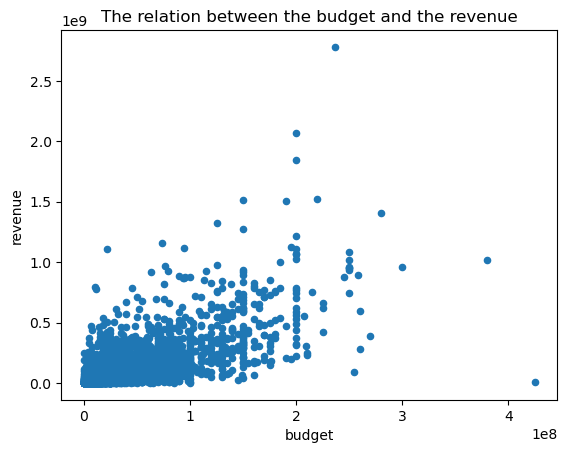

In [17]:
# plot to show the relation of the budget and the revenue of the films
df_2.plot(kind='scatter', x='budget', y='revenue', title='The relation between the budget and the revenue');

### Hmmm, I wouldn't say it's not related, it's kind a weak relation, but also most of high budget films quite have a higher revenue

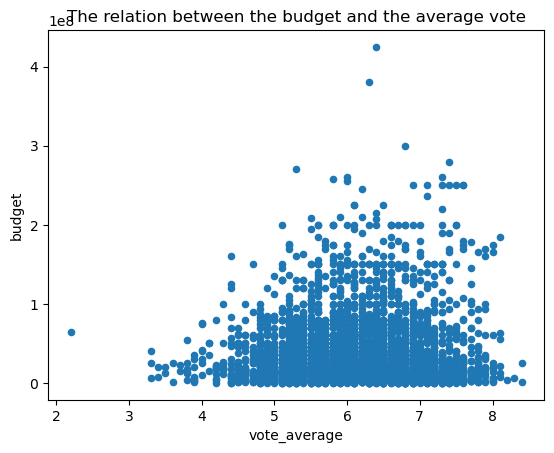

In [18]:
# plot to show the relation of the budget and the average vote of the films
df_2.plot(kind='scatter', y='budget', x='vote_average', title='The relation between the budget and the average vote');

### There is no relation between high budget and the average rating

## Q2: Which is the most production company associated with the highest average vote?

### create a dataframe with films above the third quartile of vote average

In [19]:
# create new dataframe containes films with high average vote
df_3 = df.query('vote_average > vote_average.quantile(0.75)')

In [20]:
#extract companies name into companies list
companies = []
for i in df_3['production_companies']:
    x = i.split('|')
    for j in x:
        companies.append(j)

In [21]:
# create a dtatframe with the companies list
companies_dataframe = pd.DataFrame(companies)

In [22]:
# show the companies name associated the most with the top rating films
top_comp = companies_dataframe.value_counts()
top_comp

Warner Bros.                              162
Universal Pictures                        111
Paramount Pictures                        102
Twentieth Century Fox Film Corporation     68
Walt Disney Pictures                       58
                                         ... 
Gold Circle Films                           1
Golan-Globus Productions                    1
Godspeed Pictures                           1
Goalpost Pictures                           1
uFilm                                       1
Length: 2611, dtype: int64

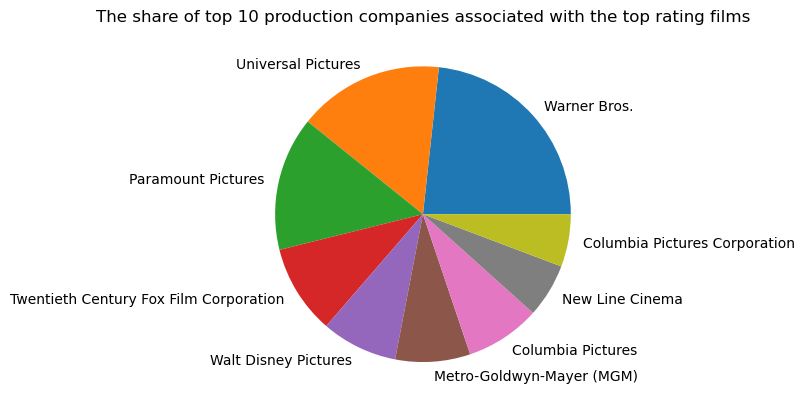

In [23]:
# extract the first 10 companies name from the cell above
cmp_name = [x[0] for x in top_comp.index[:9]]
# Pie chart shows top 10 companies associated with the top rating films
plt.pie(top_comp[:9], labels = cmp_name)
plt.title('The share of top 10 production companies associated with the top rating films');


#### The most production company associated with the highest average vote are:
<ol>
    <li>Warner Bros.</li>
    <li>Universal Pictures</li>
    <li>Paramount Pictures</li>
</ol>

## Q3: What are the characteristics associated with short and long runtime?

In [24]:
#extract the rows with runtime above the median 
df_long_run = df.query('runtime > runtime.quantile(0.5)')

In [25]:
#extract the rows with runtime below the median 
df_short_run = df.query('runtime < runtime.quantile(0.5)')

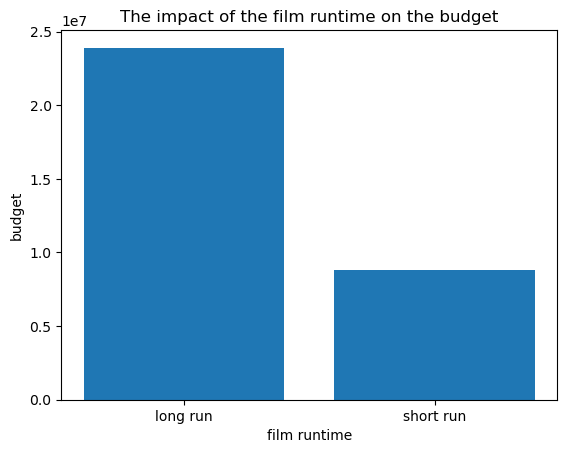

In [26]:
# A bar plot to compare between the buget of the long and short run time films
plt.bar(['long run', 'short run'],[df_long_run['budget'].mean(), df_short_run['budget'].mean()])
plt.title('The impact of the film runtime on the budget')
plt.xlabel('film runtime')
plt.ylabel('budget');

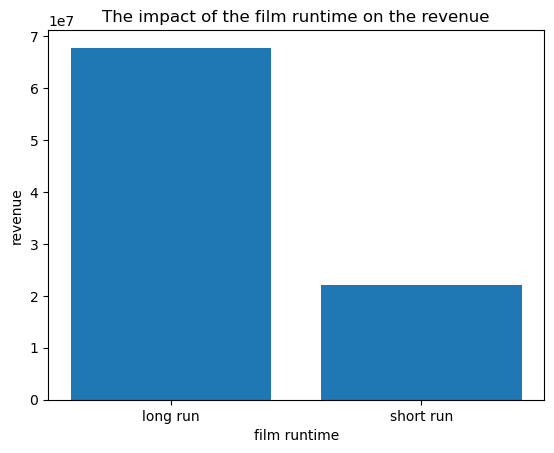

In [27]:
# A bar plot to compare between the revenue of the long and short run time films
plt.bar(['long run', 'short run'],[df_long_run['revenue'].mean(), df_short_run['revenue'].mean()])
plt.title('The impact of the film runtime on the revenue')
plt.xlabel('film runtime')
plt.ylabel('revenue');

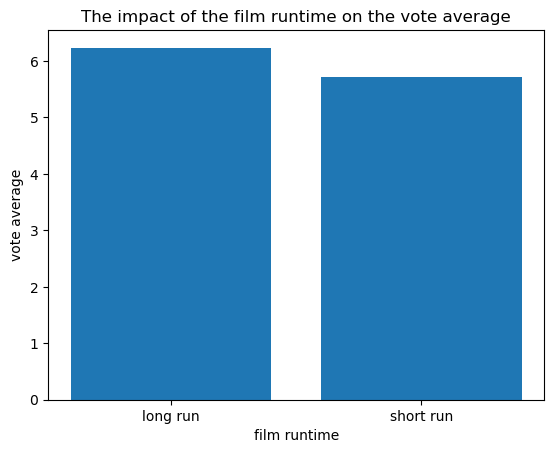

In [28]:
# A bar plot to compare between the average vote of the long and short run time films
plt.bar(['long run', 'short run'],[df_long_run['vote_average'].mean(), df_short_run['vote_average'].mean()])
plt.title('The impact of the film runtime on the vote average')
plt.xlabel('film runtime')
plt.ylabel('vote average');

<a id='conclusions'></a>
## Conclusions

We have discussed the main three questions above and we found that, films with higher budget quite have higher revenue, films with higher budget doesn't mean high average vote, The most production company associated with the highest average vote are:
<ol>
    <li>Warner Bros.</li>
    <li>Universal Pictures</li>
    <li>Paramount Pictures</li>
</ol>
long run time films have higher budget and higher revenue than films with short run time, but both have quite the same average vote


##### Alot more can be discussed like:
<ul>
    <li>the genres popularity over years</li>
    <li>the most keyword associated with each genre</li>
    <li>the cast associated with most preferable films</li>
    <li>the director with most profitable films</li>
</ul>
and alot more.

## Limitations:
Alot of films had a zero budget and a zero revenue which affected the analysis of the first questions, and i had to remove those films.

It would be much more useful to undertstand how popularity, budget_adj and revenue_adj values were calculated

## References:
<ul>
    <li>Pandas Documentation</li>
    <li>matplotlib Documentations</li>
    <li>Geeks for geeks website</li>
</ul>